In [1]:
import os
import glob

def remove_files_with_pattern(folder_path, pattern):
    # Create the full pattern for glob
    full_pattern = os.path.join(folder_path, pattern)
    
    # Use glob to find files matching the pattern
    files_to_remove = glob.glob(full_pattern)
    
    # Remove each file
    for file_path in files_to_remove:
        try:
            os.remove(file_path)
            print(f"Removed: {file_path}")
        except Exception as e:
            print(f"Error removing {file_path}: {e}")

# Example usage
folder_path = 'blob'  # Replace with your folder path
pattern = '*'  # Replace with your desired pattern (e.g., '*.jpg', '*.log', etc.)
remove_files_with_pattern(folder_path, pattern)


Removed: blob/imagen_45.png
Removed: blob/imagen_694.png
Removed: blob/imagen_184.png
Removed: blob/imagen_1167.png
Removed: blob/imagen_12.png
Removed: blob/imagen_221.png
Removed: blob/imagen_480.png
Removed: blob/imagen_990.png
Removed: blob/imagen_33.png
Removed: blob/imagen_759.png
Removed: blob/imagen_945.png
Removed: blob/imagen_841.png
Removed: blob/imagen_831.png
Removed: blob/imagen_350.png
Removed: blob/imagen_1124.png
Removed: blob/imagen_1003.png
Removed: blob/imagen_872.png
Removed: blob/imagen_224.png
Removed: blob/imagen_24.png
Removed: blob/imagen_1089.png
Removed: blob/imagen_1043.png
Removed: blob/imagen_835.png
Removed: blob/imagen_1149.png
Removed: blob/imagen_579.png
Removed: blob/imagen_168.png
Removed: blob/imagen_575.png
Removed: blob/imagen_995.png
Removed: blob/imagen_1012.png
Removed: blob/imagen_20.png
Removed: blob/imagen_664.png
Removed: blob/imagen_900.png
Removed: blob/imagen_956.png
Removed: blob/imagen_108.png
Removed: blob/imagen_1169.png
Removed: bl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde el CSV
df = pd.read_csv('../sorted_outputs/a_4_b_1/output_43.csv')
df.columns = df.columns.str.strip()
print(df.head())


         t         mx    my    mr        p0x       p0y    p0r        p1x  \
0  0.00000  99.850000  35.0  0.15  90.191324  8.467055  0.150  10.823136   
1  0.01875  99.839071  35.0  0.17  90.193567  8.473216  0.162  10.829651   
2  0.03750  99.828142  35.0  0.17  90.199589  8.489777  0.186  10.847161   
3  0.05625  99.798766  35.0  0.21  90.210815  8.520685  0.222  10.879835   
4  0.07500  99.778371  35.0  0.19  90.228545  8.569650  0.270  10.931580   

         p1y    p1r  ...   p11r       p12x      p12y   p12r       p13x  \
0  24.911114  0.150  ...  0.150  25.305800  9.569820  0.150  69.072637   
1  24.911852  0.162  ...  0.162  25.312005  9.571937  0.162  69.077767   
2  24.913837  0.186  ...  0.186  25.328683  9.577627  0.186  69.091552   
3  24.917541  0.222  ...  0.222  25.359805  9.588247  0.222  69.117273   
4  24.923408  0.270  ...  0.270  25.409089  9.605072  0.270  69.157991   

        p13y   p13r       p14x       p14y   p14r  
0  59.498967  0.150  83.697354  17.994728  0.15

KeyboardInterrupt: 

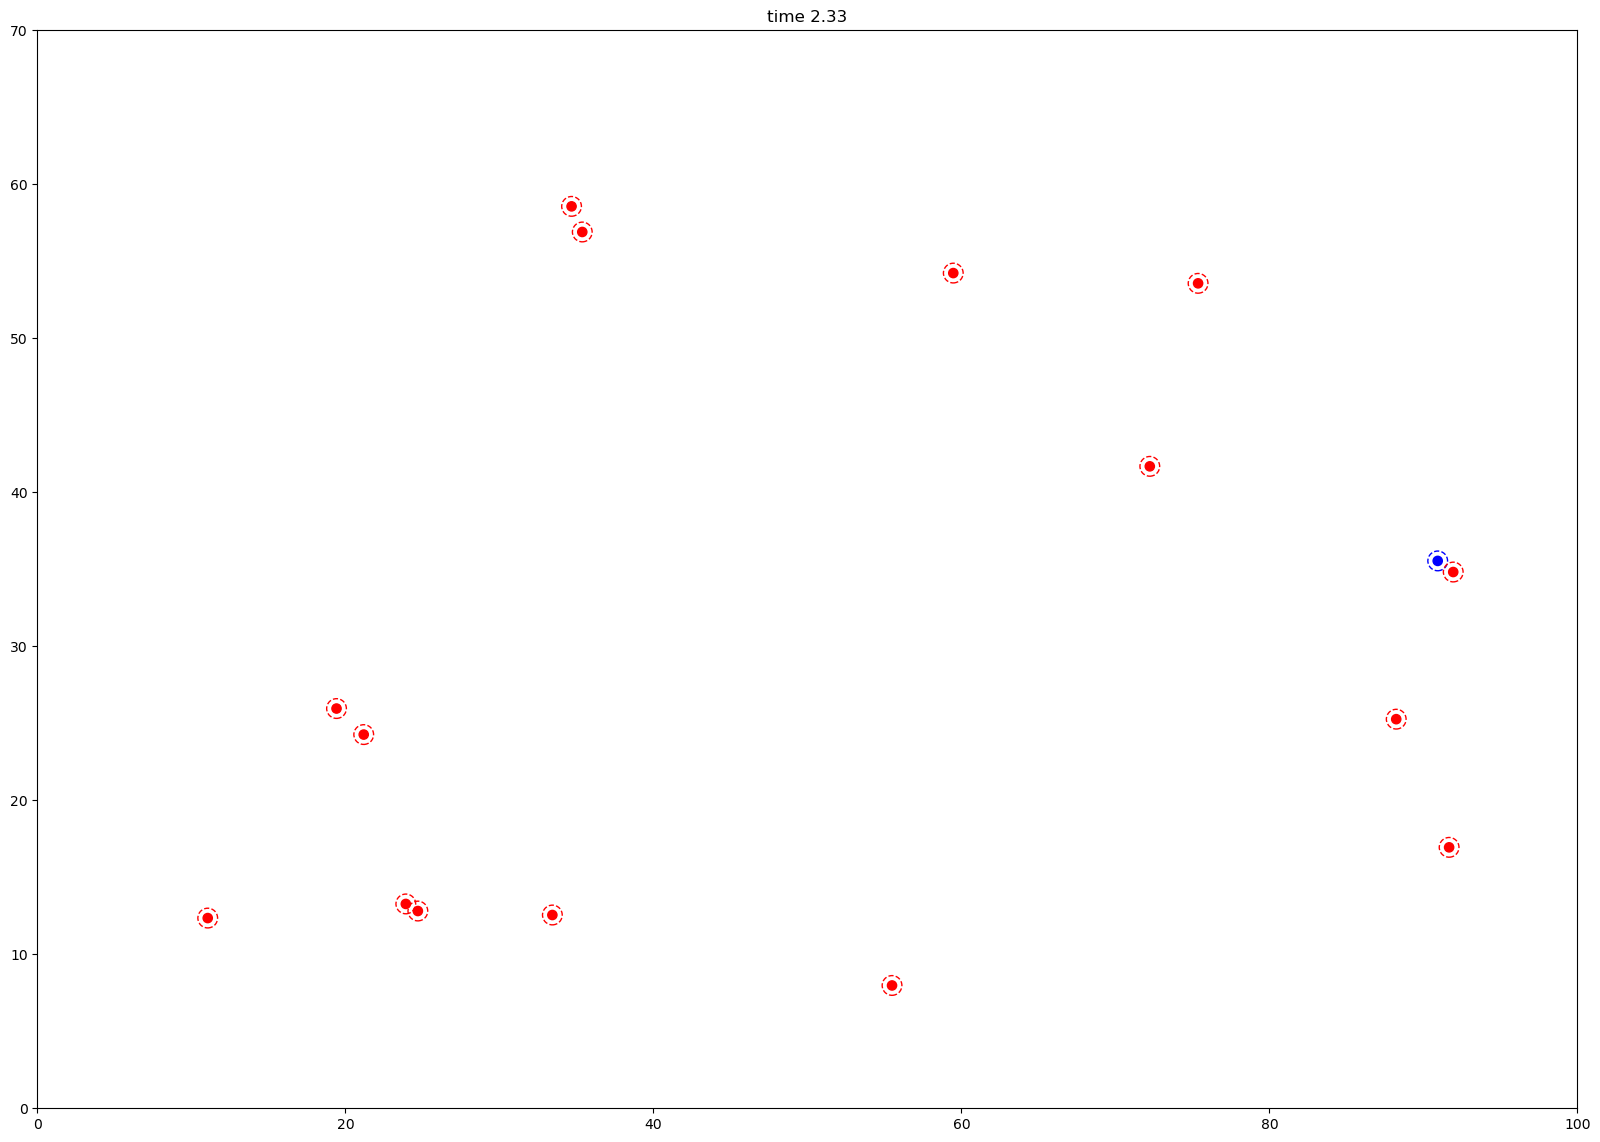

In [3]:
# Recorrer cada fila del DataFrame
import json

# Opening JSON file
f = open('../config.json',)
 
# returns JSON object as 
# a dictionary
data = json.load(f)
min_r = data["minRadius"]
N = data["blueN"]
resize = 2
for index, row in df.iterrows():
    fig, ax = plt.subplots(figsize=(20,14))
    # Dibujar el círculo azul (mx, my, mr)
    circle = plt.Circle((row['mx'], row['my']), min_r * resize, color='blue')
    circle_dashed = plt.Circle((row['mx'], row['my']), row['mr']* resize, color='blue', fill=False, linestyle='--')
    ax.add_patch(circle)
    ax.add_patch(circle_dashed)

    # Dibujar los puntos rojos (p0x, p0y, ..., p14x, p14y) con su radio correspondiente (p0r, p1r, ..., p14r)
    for i in range(N):
        circle = plt.Circle((row[f'p{i}x'], row[f'p{i}y']), min_r* resize, color='red')
        circle_dashed = plt.Circle((row[f'p{i}x'], row[f'p{i}y']), row[f'p{i}r']* resize, color='red', fill=False, linestyle='--')# Radio ajustado con pnr
        ax.add_patch(circle)
        ax.add_patch(circle_dashed)

    # Configuración de ejes
    ax.set_aspect('equal')
    ax.set_xlim(0, 100)  # Limite en el eje X de 0 a 100
    ax.set_ylim(0, 70)   # Limite en el eje Y de 0 a 70
    # Guardar la imagen con un nombre único (por ejemplo usando el índice)
    time = row['t']
    plt.title(f'time {time:.2f}')
    plt.savefig(f'blob/imagen_{index}.png')
    
    plt.close('all')


In [4]:
import glob
import os
import imageio.v2 as imageio
from tqdm import tqdm

def create_video(input_pattern, output_file, fps=30):
    # Create a list of images
    images = sorted(glob.glob(input_pattern), key=lambda x: float(x.split('_')[-1][:-4]))
    
    # Check if images were found
    if not images:
        print(f"No images found matching the pattern: {input_pattern}")
        return False

    try:
        # Get the first image to determine dimensions
        first_image = imageio.imread(images[0])
        height, width = first_image.shape[:2]

        # Create a writer object
        writer = imageio.get_writer(output_file, fps=fps, macro_block_size=None)

        # Read and write images
        for image_path in tqdm(images, desc="Processing images"):
            image = imageio.imread(image_path)
            writer.append_data(image)

        # Close the writer
        writer.close()
        
        print(f"Video created successfully: {output_file}")
        return True
    except Exception as e:
        print(f"An error occurred while creating the video: {e}")
        return False

# Usage
input_pattern = "blob/imagen_*.png"
output_file = 'animacion.mp4'
success = create_video(input_pattern, output_file)


Processing images: 100%|██████████| 1352/1352 [01:16<00:00, 17.66it/s]


Video created successfully: animacion.mp4


In [5]:
from IPython.display import Video
url = 'animacion.mp4'
Video(url)